Импорты и скачивание датасета:

In [111]:
!wget https://raw.githubusercontent.com/jldbc/coffee-quality-database/refs/heads/master/data/arabica_data_cleaned.csv -O arabica.csv

--2026-01-27 21:29:53--  https://raw.githubusercontent.com/jldbc/coffee-quality-database/refs/heads/master/data/arabica_data_cleaned.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 649689 (634K) [text/plain]
Saving to: ‘arabica.csv’

arabica.csv         100%[===================>] 634.46K  --.-KB/s    in 0.02s   

2026-01-27 21:29:54 (36.2 MB/s) - ‘arabica.csv’ saved [649689/649689]



In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Предварительный просмотр данных:

In [113]:
arabica = pd.read_table('arabica.csv', quotechar='"', delimiter=',').drop_duplicates().reset_index(drop=True)

In [114]:
arabica #this dataset comes pre-sorted by total cupping score in descending order; this means that #1 is the best and #1310 is the worst coffee on the list

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.00,2200.00,2075.00
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.00,2200.00,2075.00
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.00,1800.00,1700.00
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.00,2200.00,2000.00
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.00,2200.00,2075.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,1307,Arabica,juan carlos garcia lopez,Mexico,el centenario,NaN,"la esperanza, municipio juchique de ferrer, ve...",1104328663,terra mia,900,...,NaN,20,"September 17th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,900.00,900.00,900.00
1307,1308,Arabica,myriam kaplan-pasternak,Haiti,200 farms,NaN,coeb koperativ ekselsyo basen (350 members),NaN,haiti coffee,~350m,...,Blue-Green,16,"May 24th, 2013",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,350.00,350.00,350.00
1308,1309,Arabica,"exportadora atlantic, s.a.",Nicaragua,finca las marías,017-053-0211/ 017-053-0212,beneficio atlantic condega,017-053-0211/ 017-053-0212,exportadora atlantic s.a,1100,...,Green,5,"June 6th, 2018",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1100.00,1100.00,1100.00
1309,1310,Arabica,juan luis alvarado romero,Guatemala,finca el limon,NaN,beneficio serben,11/853/165,unicafe,4650,...,Green,4,"May 24th, 2013",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,ft,1417.32,1417.32,1417.32


In [115]:
arabica.dtypes

,0
Unnamed: 0,int64
Species,object
Owner,object
Country.of.Origin,object
Farm.Name,object
Lot.Number,object
Mill,object
ICO.Number,object
Company,object
Altitude,object


Мы видим много как категориальных, так и числовых переменных, с которыми нам придётся работать.

In [116]:
arabica.describe()

,Unnamed: 0,Number.of.Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.00000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1310.000000,1311.000000,1084.000000,1084.000000,1084.000000
mean,656.000763,153.887872,7.563806,7.518070,7.397696,7.533112,7.517727,7.517506,9.833394,9.83312,9.903272,7.497864,82.115927,0.088863,0.426392,0.177099,3.591915,1759.548954,1808.843803,1784.196379
std,378.598733,129.733734,0.378666,0.399979,0.405119,0.381599,0.359213,0.406316,0.559343,0.77135,0.530832,0.474610,3.515761,0.047957,1.832415,0.840583,5.350371,8767.847252,8767.187498,8767.016913
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,328.500000,14.500000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.00000,10.000000,7.250000,81.170000,0.090000,0.000000,0.000000,0.000000,1100.000000,1100.000000,1100.000000
50%,656.000000,175.000000,7.580000,7.580000,7.420000,7.500000,7.500000,7.500000,10.000000,10.00000,10.000000,7.500000,82.500000,0.110000,0.000000,0.000000,2.000000,1310.640000,1350.000000,1310.640000
75%,983.500000,275.000000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.00000,10.000000,7.750000,83.670000,0.120000,0.000000,0.000000,4.000000,1600.000000,1650.000000,1600.000000
max,1312.000000,1062.000000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.00000,10.000000,10.000000,90.580000,0.280000,31.000000,11.000000,55.000000,190164.000000,190164.000000,190164.000000


Максимальная высота выходит за пределы атмосферы Земли. Кофе не растёт и не собирается на таких высотах; судя по всему, это ошибка в датасете, поэтому такие артефакты сочтём за выбросы.

In [117]:
weird_altitudes = arabica.loc[arabica['altitude_mean_meters'] > 7000]

In [118]:
weird_altitudes['altitude_mean_meters']

,altitude_mean_meters
543,11000.0
896,190164.0
1040,110000.0
1144,190164.0


In [119]:
arabica = arabica[arabica['altitude_mean_meters'] < 7000]

Также противоречит здравому смыслу то, что в датасет входит кофе, которого было произведено 0 мешков; как и то, что в него входит кофе, получивший ровно 0 баллов за все критерии качества. Мы уберём эти данные из рассмотрения.

In [120]:
arabica = arabica[arabica['Total.Cup.Points'] > 10]

In [121]:
arabica = arabica[arabica['Number.of.Bags'] > 1]

In [122]:
arabica['Country.of.Origin'].value_counts()

,count
Country.of.Origin,
Mexico,228
Guatemala,153
Colombia,147
Brazil,102
Taiwan,69
Honduras,49
Costa Rica,44
"Tanzania, United Republic Of",33
Ethiopia,29


Пять наиболее популярных стран - Мексика, Колумбия, Гватемала, Бразилия и Тайвань. Так как вкусовой профиль кофе сильно зависит от терруара, важно обратить внимание на страну производства.

In [123]:
most_frequent_countries = ['Mexico', 'Colombia', 'Guatemala', 'Brazil', 'Taiwan']

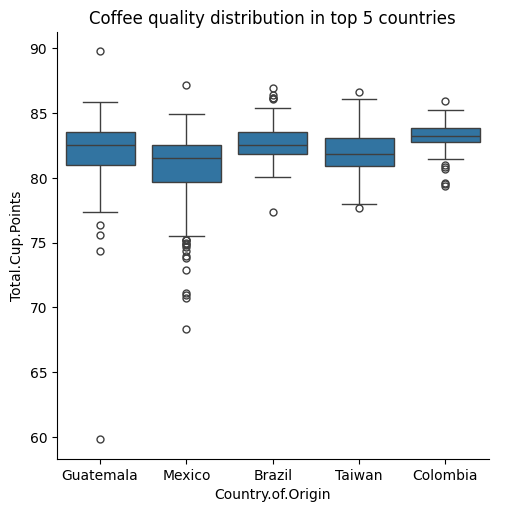

In [124]:
sns.catplot(arabica[arabica['Country.of.Origin'].isin(most_frequent_countries)], x = 'Country.of.Origin', y = 'Total.Cup.Points', kind = 'box').set(title = 'Coffee quality distribution in top 5 countries')

Стоит обратить внимание на то, как между собой коррелируют числовые аспекты оценки лотов кофе.

In [125]:
correlations = arabica[['Aroma','Flavor','Aftertaste','Acidity','Body','Balance','Uniformity','Clean.Cup','Sweetness','Cupper.Points','Moisture', 'altitude_mean_meters', 'Category.One.Defects','Category.Two.Defects']].corr()

Text(0.5, 1.0, 'Correlation heatmap between numerical parameters of coffee lots')

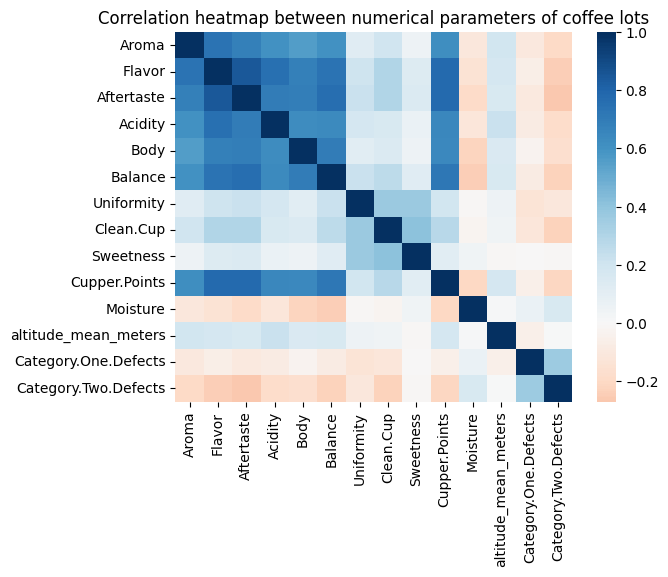

In [126]:
sns.heatmap(correlations, center=0, cmap = 'RdBu').set_title('Correlation heatmap between numerical parameters of coffee lots')

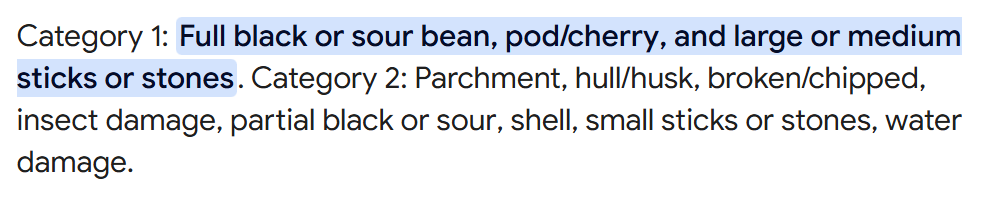

**Выводы из анализа матрицы корреляций:**

1. Сила влияния атрибутов на общий балл: Наиболее сильную положительную корреляцию с итоговым баллом демонстрируют вкус (Flavor) и послевкусие (Aftertaste). Однородность (Uniformity) и сладость (Sweetness) имеют заметно меньшую связь с финальной оценкой.

2. Влияние высоты: Наблюдается слабая положительная корреляция между высотой произрастания и качеством кофе.

3. Негативные факторы: Показатели влажности (Moisture) и, в особенности, количества дефектов (Defects) имеют отрицательную корреляцию с общим баллом, то есть ухудшают воспринимаемое качество.

4. Градация дефектов: Категория 2 дефектов (более серьёзные) оказывает более сильное негативное влияние на оценку, чем категория 1.

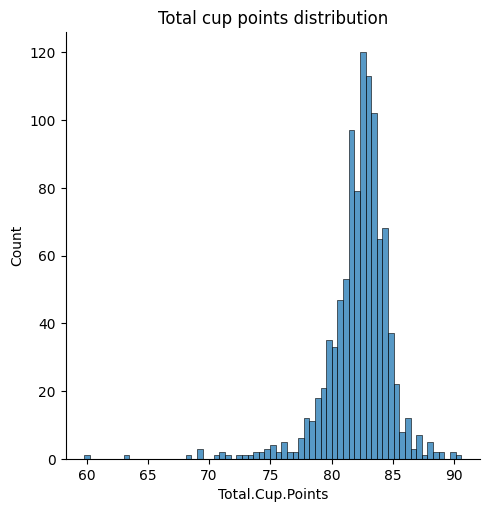

In [127]:
sns.displot(arabica, x = 'Total.Cup.Points').set(title = 'Total cup points distribution')

Кофе с оценкой выше 80 баллов классифицируется как Specialty Grade.

Кофе с оценкой 85+ баллов считается исключительным (Exceptional / Outstanding); такая высокая оценка является маркетинговым преимуществом и, как правило, указывается на упаковке.

**Распределение оценок в датасете:**

Визуальная оценка гистограммы показывает, что общие баллы имеют распределение, близкое к нормальному.

Подавляющее большинство образцов в датасете (возможно, более 80%) попадает в категорию спешелти (>80 баллов).

Для углубленного анализа выделим Exceptional кофе.

In [128]:
exceptional_coffee = arabica[arabica['Total.Cup.Points'] > 85]

In [129]:
exceptional_coffee.describe()

,Unnamed: 0,Number.of.Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,46.738462,161.230769,8.103846,8.139538,8.008923,8.104154,7.969692,8.069231,9.958769,9.989692,9.958769,8.165692,86.468923,0.074000,0.092308,0.015385,2.215385,1582.603077,1638.661046,1610.632062
std,27.986759,131.671557,0.246143,0.270066,0.265360,0.250262,0.227568,0.238467,0.162264,0.083103,0.162264,0.305025,1.317191,0.050181,0.384182,0.124035,3.049038,404.563188,435.541407,416.864802
min,1.000000,2.000000,7.580000,7.580000,7.420000,7.670000,7.580000,7.670000,9.330000,9.330000,9.330000,7.670000,85.080000,0.000000,0.000000,0.000000,0.000000,12.000000,12.000000,12.000000
25%,22.000000,14.000000,8.000000,8.000000,7.830000,7.920000,7.830000,7.920000,10.000000,10.000000,10.000000,7.920000,85.420000,0.010000,0.000000,0.000000,0.000000,1320.000000,1400.000000,1350.000000
50%,45.000000,250.000000,8.080000,8.080000,8.000000,8.080000,7.920000,8.000000,10.000000,10.000000,10.000000,8.080000,86.080000,0.100000,0.000000,0.000000,1.000000,1600.000000,1700.000000,1680.000000
75%,71.000000,300.000000,8.250000,8.330000,8.080000,8.250000,8.080000,8.170000,10.000000,10.000000,10.000000,8.330000,87.170000,0.110000,0.000000,0.000000,3.000000,1800.000000,1950.000000,1900.000000
max,93.000000,320.000000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,9.250000,90.580000,0.130000,2.000000,1.000000,18.000000,2560.000000,2560.000000,2560.000000


Посмотрим также на кофе, который не стал specialty из-за потерь минимум в два балла:

In [130]:
bad_coffee = arabica[(arabica['Total.Cup.Points'] < 78)]

In [131]:
bad_coffee.describe()

,Unnamed: 0,Number.of.Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.0,45.000000,45.000000,45.000000,45.000000
mean,1277.911111,154.266667,7.137333,6.868222,6.717111,7.079778,7.136889,6.860889,8.918444,7.466667,9.318444,6.692889,74.196222,0.107333,1.711111,0.0,9.266667,1264.171556,1295.504889,1279.838222
std,20.175167,134.347311,0.315266,0.322619,0.327509,0.345197,0.303366,0.360724,1.066155,2.350888,1.514468,0.301426,3.857810,0.037562,4.164909,0.0,8.692735,412.875096,397.699447,399.029940
min,1244.000000,10.000000,6.330000,6.170000,6.170000,6.080000,6.330000,6.080000,6.000000,0.000000,1.330000,6.000000,59.830000,0.000000,0.000000,0.0,0.000000,640.000000,800.000000,775.000000
25%,1260.000000,20.000000,7.000000,6.670000,6.500000,6.920000,7.000000,6.750000,8.000000,6.670000,9.330000,6.500000,72.920000,0.110000,0.000000,0.0,3.000000,1100.000000,1140.000000,1100.000000
50%,1279.000000,100.000000,7.080000,6.920000,6.670000,7.080000,7.170000,6.830000,9.330000,8.000000,10.000000,6.670000,75.170000,0.110000,0.000000,0.0,7.000000,1248.000000,1250.000000,1248.000000
75%,1295.000000,275.000000,7.330000,7.000000,6.920000,7.250000,7.330000,7.000000,10.000000,9.330000,10.000000,6.830000,77.000000,0.120000,1.000000,0.0,15.000000,1350.000000,1400.000000,1350.000000
max,1310.000000,550.000000,7.920000,7.750000,7.420000,7.670000,7.920000,7.830000,10.000000,10.000000,10.000000,7.670000,77.920000,0.170000,23.000000,0.0,30.000000,3500.000000,3500.000000,3500.000000


/tmp/ipython-input-2724491986.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax5.set_xticklabels(ax5.get_xticklabels(), rotation=45, horizontalalignment='right')


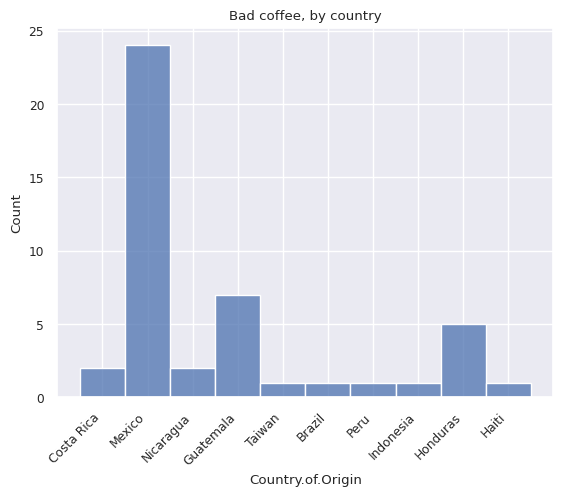

In [172]:
sns.set(font_scale=0.8)
ax5 = sns.histplot(bad_coffee, x = 'Country.of.Origin')
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=45, horizontalalignment='right')
ax5.set(title = 'Bad coffee, by country')
plt.show()

/tmp/ipython-input-516997373.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


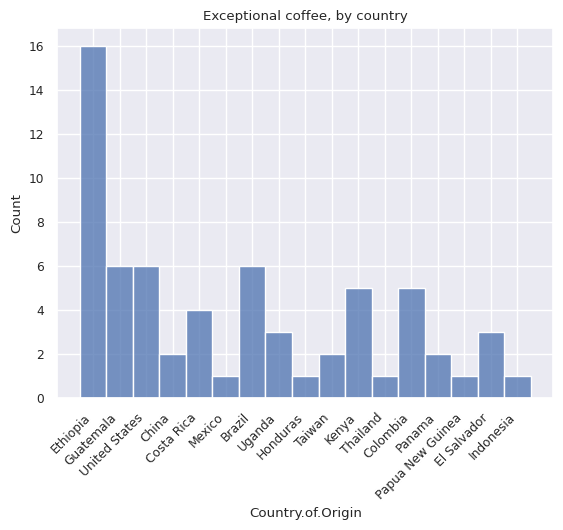

In [174]:
ax = sns.histplot(exceptional_coffee, x = 'Country.of.Origin')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set(title='Exceptional coffee, by country')
plt.show()

[Text(0.5, 1.0, 'Altitude vs Cup Points in top 5 countries')]

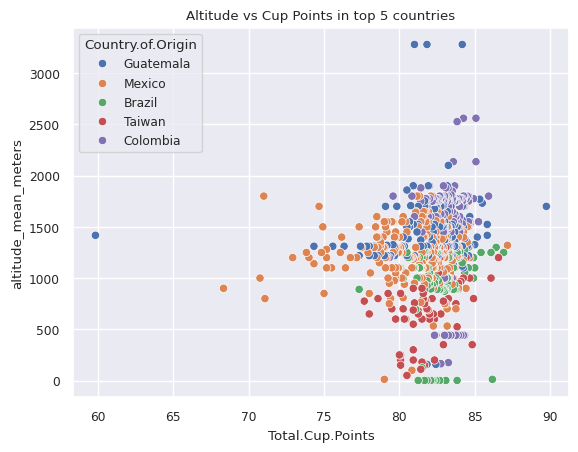

In [173]:
sns.scatterplot(arabica[arabica['Country.of.Origin'].isin(most_frequent_countries)],
                x = 'Total.Cup.Points',
                y = 'altitude_mean_meters',
                hue = 'Country.of.Origin').set(title = 'Altitude vs Cup Points in top 5 countries')

Мы знаем, что оценка каппинга и высота в некоторой степени коррелируют. Проверив, не является ли эта корреляция слабой из-за нелинейной зависимости, мы видим, что не существует сколько-нибудь выраженной кривой, которая могла бы точно описать взаимосвязь между баллом и средней высотой. Возможно, они просто не так сильно связаны.

Однако, присвоив разным странам разные цвета, мы видим, что определённые диапазоны высот чаще встречаются в одних странах, чем в других.

In [135]:
pd.DataFrame({'col': list(arabica[arabica['Country.of.Origin'] == 'Colombia']['altitude_mean_meters'].describe()),
'bra': list(arabica[arabica['Country.of.Origin'] == 'Brazil']['altitude_mean_meters'].describe()),
'mex': list(arabica[arabica['Country.of.Origin'] == 'Mexico']['altitude_mean_meters'].describe()),
'gua': list(arabica[arabica['Country.of.Origin'] == 'Guatemala']['altitude_mean_meters'].describe()),
'tai': list(arabica[arabica['Country.of.Origin'] == 'Taiwan']['altitude_mean_meters'].describe())})

,col,bra,mex,gua,tai
0,147.000000,102.000000,228.000000,153.000000,69.000000
1,1571.741497,918.470588,1233.570175,1440.018254,736.942029
2,449.338053,388.124500,267.589664,368.747450,324.627428
3,165.000000,1.000000,12.000000,157.886400,50.000000
4,1550.000000,890.000000,1100.000000,1310.640000,600.000000
5,1750.000000,1000.000000,1250.000000,1386.840000,750.000000
6,1775.000000,1200.000000,1400.000000,1524.000000,1000.000000
7,2560.000000,1300.000000,1800.000000,3280.000000,1300.000000


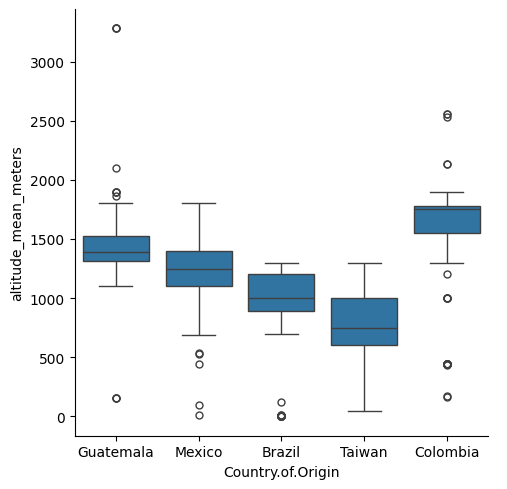

In [136]:
sns.catplot(arabica[arabica['Country.of.Origin'].isin(most_frequent_countries)],
                x = 'Country.of.Origin',
                y = 'altitude_mean_meters',
                kind = 'box')

В Гватемале и Колумбии есть некоторое количество ферм, которые находятся значительно выше всех остальных. Средняя высота выращивания в этих странах тоже значительно выше; Тайвань выращивает кофе ниже всех, следом за ним - Бразилия.

В Бразилии есть несколько ферм, которые выращивают кофе на уровне моря.

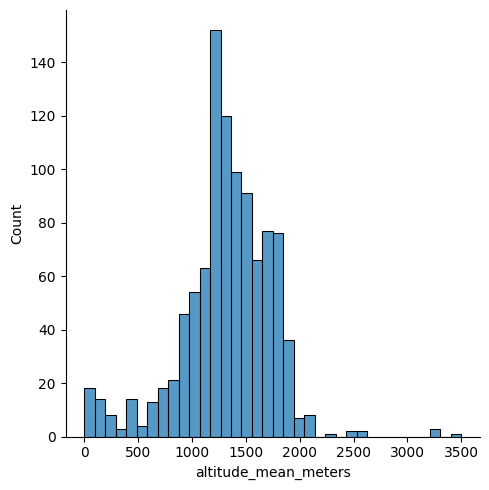

In [139]:
ax6 = sns.displot(arabica, x = 'altitude_mean_meters')
ax6.set_titles('Distribution of mean altitudes of coffee farms')

Определим, различаются ли высоты произрастания для кофе низкого и исключительно высокого качества.

Метод: Для проверки была сформулирована статистическая гипотеза.

Нулевая гипотеза (H0): Распределения высот для двух групп не различаются.

Альтернативная гипотеза (H1): Распределения высот статистически значимо различаются.

Поскольку размеры выборок были относительно невелики, а распределение данных не предполагалось нормальным, для сравнения был выбран непараметрический U-критерий Манна-Уитни.

In [140]:
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(bad_coffee['altitude_mean_meters'], exceptional_coffee['altitude_mean_meters'])
print('U-stat:', round(stat, 3), '\np-val:', round(p, 10))

U-stat: 508.0 
p-val: 6.5e-09


Text(0.5, 1.0, 'Altitudes of bad (red) and very good (blue) coffee')

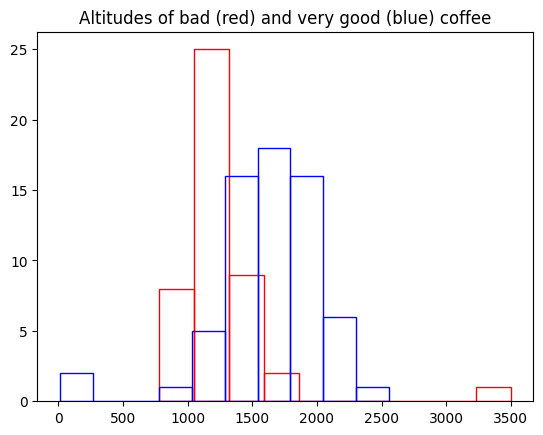

In [141]:
ax0 = plt.hist(bad_coffee['altitude_mean_meters'], fill = False, edgecolor = 'Red', label ='a')
ax1 = plt.hist(exceptional_coffee['altitude_mean_meters'], fill = False, edgecolor = 'Blue')
plt.title('Altitudes of bad (red) and very good (blue) coffee')

U-тест Манна-Уитни подтвердил, что распределения высот для кофе низкого и высшего качества статистически значимо различаются (p < 0.01). Это означает, что высота является важным фактором для достижения максимальных оценок, даже при слабой общей корреляции.

Проверим статистические различия между лотами из Тайваня и Колумбии.

Нулевая гипотеза (H0): Средние высоты ферм в Колумбии и на Тайване одинаковы (данные взяты из одного распределения).

Альтернативная гипотеза (H1): Средние высоты различаются (данные принадлежат разным распределениям).

Выборка данных по каждой стране достаточно велика, что позволяет предположить нормальность распределения высот и применить параметрический критерий (t-тест).


In [110]:
from scipy.stats import ttest_ind
stat, p = ttest_ind(arabica[arabica['Country.of.Origin'] == 'Taiwan']['altitude_mean_meters'], arabica[arabica['Country.of.Origin'] == 'Colombia']['altitude_mean_meters'])
print('T-stat:', round(stat, 3), '\np-val:', round(p, 20))

T-stat: -13.824 
p-val: 0.0


Высота произрастания является характерной региональной особенностью. Из этого следует, что этот фактор сильно зависит от территории, на которой находится страна (что логично, если смотреть на различия ландшафта этих двух стран).

Интересно, что одним из параметров является цвет бобов. Посмотрим на него более углубленно.

In [137]:
arabica['Color'].value_counts()

,count
Color,
Green,712
Bluish-Green,73
Blue-Green,63


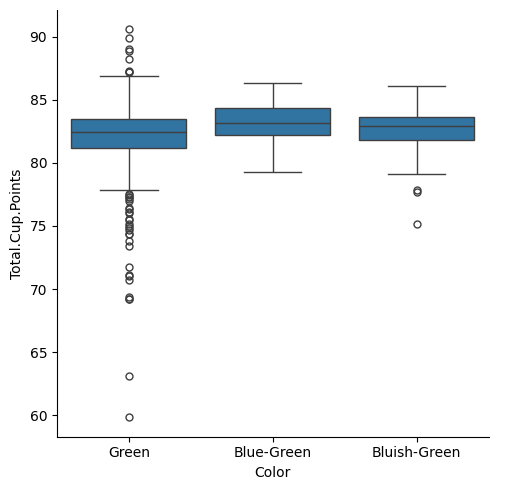

In [138]:
sns.catplot(arabica, x = 'Color', y = 'Total.Cup.Points', kind = 'box').set_titles('a')

Зелёный цвет - самый распространённый. Из графика кажется, что цвет не влияет на балл грейдинга.

Проверим, зависит ли качество напитка от цвета бобов. Разделим лоты на две категории: выше и ниже среднего (средний балл - примерно 82).

In [142]:
arabica['quality'] =  [1 if x > 82  else 0 for x in arabica['Total.Cup.Points']]

In [143]:
data = pd.crosstab(arabica['Color'],arabica['quality'], margins = False)
data

quality,0,1
Color,,
Blue-Green,14,49
Bluish-Green,21,52
Green,297,415


In [144]:
from scipy.stats import chi2_contingency
stat, pval, dof, exp = chi2_contingency(data)
print(stat, pval)

12.845243992851792 0.001624391497467949


Если разделить лоты на "хорошие" и "плохие" по качеству, то можно отметить, что категория качества зависит от цвета бобов. Зелёные бобы в среднем хуже по качеству, чем сине-зелёные.

**Анализ датасета specialty кофе показал:**

1. Ключевые страны-поставщики: Бразилия, Мексика, Колумбия, Гватемала, Тайвань (по количеству лотов в выборке).

2. Драйверы качества: Вкусовые аспекты сильно коррелируют между собой (r=0.5-0.85), а влажность и дефекты снижают балл (r≈ -0.3, -0.45).

3. Роль высоты: Для наилучших лотов характерна значимо бо́льшая высота произрастания (t-тест, p<0.01).

4. География качества: Эфиопия — источник наиболее выдающихся лотов, Мексика имеет повышенную долю низкокачественных в данной выборке.

5. Локальная специфика: Высота выращивания статистически значимо различается между странами (напр., Колумбия vs. Тайвань, p<0.01).

6. Влияние обжарки: Светлая обжарка ассоциирована с качеством выше среднего (p<0.01).